In [28]:
# install libraries
import influxdb_client
import pandas as pd
import secret
from sensor_data_functions import get_sensor_data
from weather_data_functions import get_weather_data
from irradiance_data_functions import irradiance_data
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import math
import pytz

In [29]:
year = 2023
month = 12
day = 15
date_time = datetime(year=year, month=month, day=day)

generation_df, consumption_df = get_sensor_data(date_time)

generation_df.head()

Data not found in local storage, querying influxdb


,power
datetime,
2023-12-15 00:00:00+00:00,0.084360
2023-12-15 00:00:01+00:00,0.082719
2023-12-15 00:00:02+00:00,0.084264
2023-12-15 00:00:03+00:00,0.083102
2023-12-15 00:00:04+00:00,0.083704


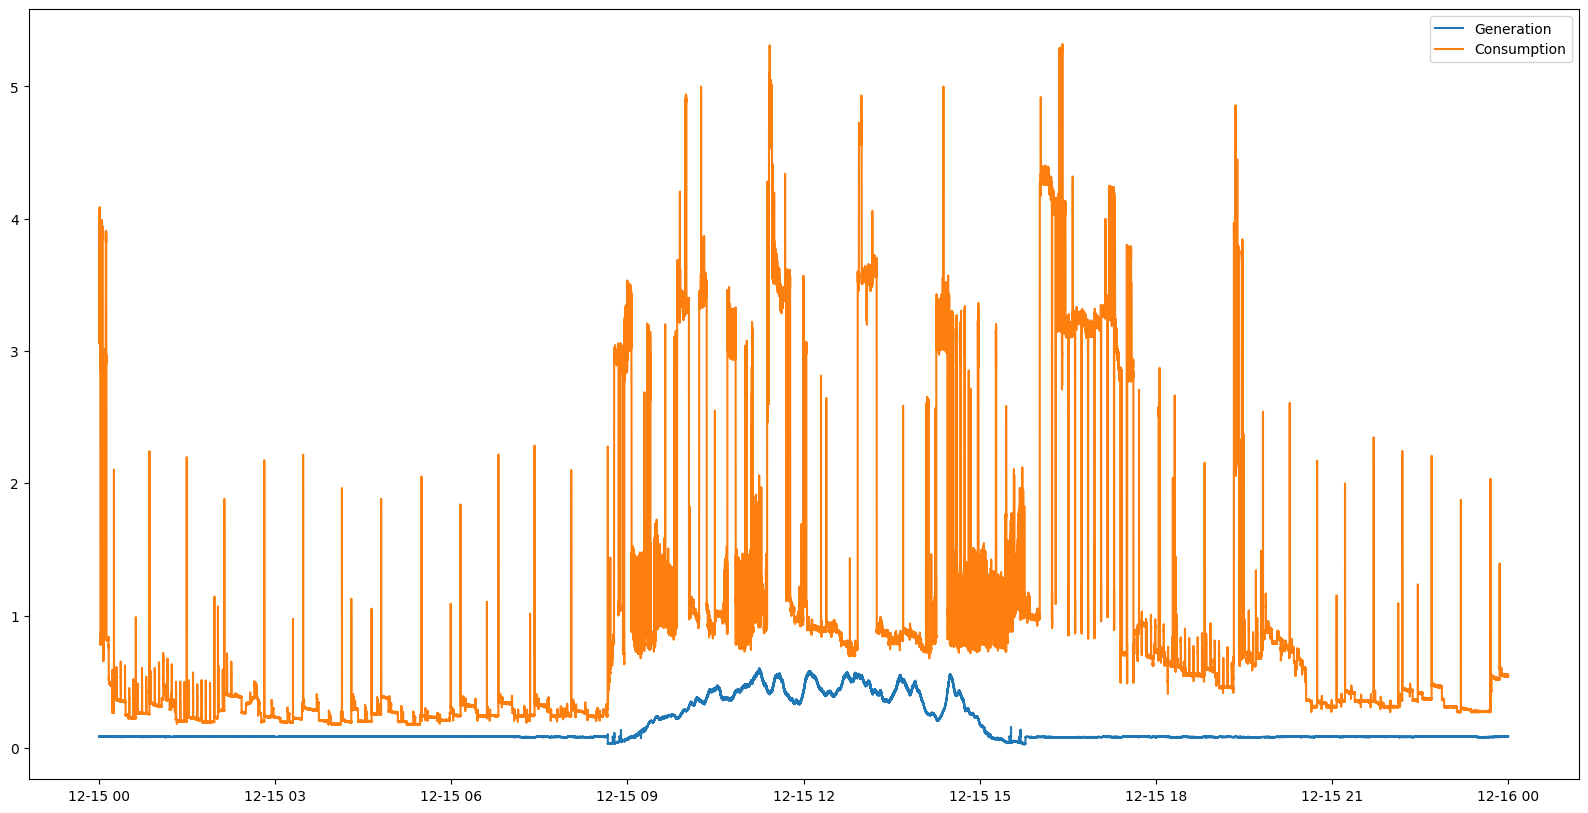

In [30]:
# plot both generation and consumption
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(generation_df.index, generation_df['power'], label='Generation')
ax.plot(consumption_df.index, consumption_df['power'], label='Consumption')
ax.legend()

In [31]:
postcode = 'WR7 4BU'

weather = get_weather_data(postcode, date_time)
weather.head()

Weather data loaded from API


,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,wind_dir,pressure_mb,pressure_in,...,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph,uv,condition
time,,,,,,,,,,,,,,,,,,,,,
2023-12-15 00:00:00,1702598400,3.7,38.6,0,4.5,7.2,243,WSW,1030.0,30.41,...,0,0,0,0,10.0,6.0,9.4,15.1,1.0,Clear
2023-12-15 01:00:00,1702602000,3.5,38.4,0,5.1,8.3,245,WSW,1031.0,30.43,...,0,0,0,0,10.0,6.0,10.8,17.4,1.0,Clear
2023-12-15 02:00:00,1702605600,3.4,38.2,0,4.7,7.6,247,WSW,1032.0,30.46,...,0,0,0,0,10.0,6.0,9.9,15.9,1.0,Clear
2023-12-15 03:00:00,1702609200,3.4,38.2,0,4.5,7.2,238,WSW,1032.0,30.48,...,0,0,0,0,10.0,6.0,9.4,15.1,1.0,Partly cloudy
2023-12-15 04:00:00,1702612800,3.7,38.7,0,4.5,7.2,240,WSW,1033.0,30.49,...,0,0,0,0,10.0,6.0,9.4,15.1,1.0,Partly cloudy


In [32]:
irradiance_data(postcode, date_time)

No local data available, calling API


,start,end,clear_sky,cloudy_sky,start_time
0,00:00,00:15,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-15 00:00:00
1,00:15,00:30,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-15 00:15:00
2,00:30,00:45,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-15 00:30:00
3,00:45,01:00,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-15 00:45:00
4,01:00,01:15,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-15 01:00:00
...,...,...,...,...,...
91,22:45,23:00,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-15 22:45:00
92,23:00,23:15,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-15 23:00:00
93,23:15,23:30,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-15 23:15:00
94,23:30,23:45,"{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}","{'ghi': 0.0, 'dni': 0.0, 'dhi': 0.0}",2023-12-15 23:30:00
